# Lista 4
### Gabriel Wechta 250111

## _Interpolacja_ za pomocą wielomianu
* Mając $n+1$ par postaci $(x_i, y_i)$, należy znaleźć wielomian $p$ możliwie najniższego stopnia, taki że $p(x_i)=y_i$ dla $ 0 \leq i \leq n$. 

# Zadanie 1
Mamy napisać funkcję obliczającą ilorazy różnicowe, dla zadanych węzłów $x_0, x_1, ... x_n$ i zadanych wartości $f(x_0), f(x_1), ... f(x_n)$.

Niech $f:X \mapsto Y$ i $ x_1, x_2 \in X$, wtedy ilorazem różnicowym nazwiemy: $\frac{f(x_2) - f(x_1)}{x_2 - x_1}$.

Iloraz różnicowy jest miarą przyrostu funkcji na obszarze $[x_1, x_2]$. Można zauważyć, że definicja pochodnej jednej zmiennej w punkcie jest ilorazem różnicowym na bardzo małym obszarze (dążącym do zera). 
Ilorazów różnicowych używa się między innymi do interpolacji funkcji, o tym w kolejnych zadaniach.
Na wykładzie została przedstawiona notacja $f[x_0, x_1,...,x_n]$ zadana wzorem rekurencyjnym:

$f[x_0, x_1, ... x_k] = \frac{f[x_1, x_2, ... x_k] - f[x_0, x_1, ... x_{k-1}]}{x_k-x_0}$

Co bezpośrednio daje nam wzór rekurencyjny na obliczenie $f[x_0, x_1, ... x_n]$. 

Przykładowo, $f[x_0, x_1]$ obliczymy następująco:

$f[x_0, x_1] = \frac{f[x_1]-f[x_0]}{x_1 - x_0} = \frac{f(x_1)-f(x_0)}{x_1 - x_0}$


### Wyjaśnienie działania programu
Zapisując iteracyjnie powyższą zależność rekurencyjną, liczymy od największych indeksów, co iterację pętli zewnętrznej zwiększając zakres. 
Pętle zewnętrzna: 
* indeks $j$ wskazuje na liczbę elementów, po których liczone są ilorazy różnicowe.
Pętle wewnętrzna:
* indeks $i$ wskazuje na prawy koniec indeksów, czyli aktualnie obliczany iloraz różnicowy.
* zapisuje w $i$ komórce pamięci wynik.
Poniższy program oblicza ilorazy różnicowe "w miejscu", co oznacza, że jedyne operacje na tablicach są wykonywane na tablicach przekazanych do funckji.

In [179]:
function ilorazyRoznicowe(x::Vector{Float64}, f::Vector{Float64})
    n = length(x) 
    for j in 2:n
        for i in n:-1:j
            f[i] = (f[i] - f[i-1])/(x[i] - x[i-j+1])
            # println(f)
        end
    end
    return f
end

ilorazyRoznicowe (generic function with 1 method)

In [180]:
# test poprawności, przykład z Kincaid, Cheney
x = [3.0, 1.0, 5.0, 6.0]
f = [1.0, -3.0, 2.0, 4.0]
print(ilorazyRoznicowe(x, f))
# spodziewany wynik [1.0, 2.0, -0.375, 0.175]

[1.0, 2.0, -0.375, 0.17500000000000002]

# Zadanie 2
Mamy napisać funkcję obliczającą wartość wielomianu interpolacyjnego stopnia $n$ w postaci Newtona, w punkcie $t$ za pomocą uogólnionego algorytmu Hornera, w czasie $O(n)$.
* Wielomian w postaci Newtona:
    $N_n(x) = f[x_0] + f[x_0, x_1](x − x_0)+...+f[x_0, x_1,..., x_n](x − x_0)(x − x_1)...(x − x_{n−1})$
* Uogólniony algorytm Hornera:
    * $w_n(x) = f[x_0, x_1,..., x_n]$
    * $w_k(x) = f[x_0, x_1,..., x_k] + (x − x_k)w_{k+1}(x)$, dla $k \in \{n-1, ..., 0\}$
    * $N_n(x) = w_0(x)$
* W czasie $O(n)$:
    Poniższy program ma jedną pętle, która wykonuje się $n-1$, gdzie $n$ to długość wektora początkowego. Tym samym złożność jest liniowo zależna od $n$, ponadto pętla ma w sobie wyłacznie operacje arytemtyczne o złożoności jednostkowej, a więc złożoność programu jest $O(n)$.

### Wyjaśnienie działania programu
Idea programu polega na zapisaniu uogólnionego algorytmu Hornera pod postacią iteracji, jest to możliwe przy rozpoczęciu indeksowania od $n$, a zakończeniu na $1$, wtedy wartość niezbędna do obliczenia $n-1$-ego wyrażenia była już obliczona w $n$-tym wyrażeniu.

Problem na pierwszy rzut oka wydaje się być trudny, ale to głównie przez długość zapisu wielomianu pod postacią Newtona. Kiedy ilorazy różnicowe są podane jako parametr, obliczenie wartość wielomianu w punkcie sprowadza się do zwykłej pętli. 

In [181]:
function warNewton(x::Vector{Float64}, fx::Vector{Float64}, t::Float64)
    n = length(x) - 1
    pol_val = fx[n + 1]
    for i in n:-1:1
        pol_val = fx[i] + (t - x[i])*pol_val
    end
    return pol_val
end

warNewton (generic function with 1 method)

In [182]:
# test poprawności, przykład z Kincaid, Cheney
# na podstawie wyliczonych ilorazów różnicowych w poprzednim zadaniu, wyliczymy wartość funkcji
x = [3.0, 1.0, 5.0, 6.0] # takie same wezły jak w poprzednim
fx = [1.0, 2.0, -0.375, 0.175] # takie same ilorazy różnicowe
for t in [3.0, 1.0, 5.0, 6.0]
    println(warNewton(x, fx, t))
end
# spodziewane wyniki [1.0, -3.0, 2.0, 4.0] - takie same jak wartości funkcji w poprzednim teście

1.0
-3.0
2.0
4.0


# Zadanie 3
Znając współczynniki wielomianu interpolacyjnego w postaci Newtona, to jest znając ilorazy różnicowe oraz odpowiadające im węzły, mamy napisać funckję obliczającą współczynniki wielomianu w postaci normalnej.
* Wielomian $p(x)$ jest w postaci normalnej, gdy:

    $p(x)=\sum _{i=0}^{n}a_{i}x^{i}$,
    
gdzie $a_{0},a_{1},\dots ,a_{n} \in \mathbb{R}$ oraz $a_{n}\neq 0$.

Odpowiedzią do zadania jest tablica $[a_0,a_1,\dots,a_n]$

### Wyjaśnienie działania programu
Aby znaleźć współczynniki wielomianu skorzystamy z uogólnionego algorytmu Hornera z poprzedniego zadania.

Bazując na algorytmie Hornera zauważmy najpierw, że $a_n = c_n$, ponieważ $w_n(x) = f[x_0, x_1,..., x_n]$.
Posiadając $a_n$, obliczamy wartość $a_i$ bazując na wcześniej obliczonym współczynnikku $a_{i+1}$, to jest iterując po $i$ od $n-1$ do $1$ innymi słowy obliczamy $w_i$ z poprzedniego zadania. Wewnętrzna pętla algorytmu tak zmienia tworzone  współczynniki postaci naturalnej, ażeby dla każdego $w_j$, $(j=i+1,i+2,\dots,n-1)$ doprowadzić w danej iteracji do postaci naturalnej.

In [183]:
function naturalna(x::Vector{Float64}, fx::Vector{Float64})
    n = length(x)
    a = zeros(n)
    a[n] = fx[n]

    for i in n-1:-1:1
        a[i] = fx[i] - a[i + 1] * x[i]

        for j in i+1:n-1
            a[j] = a[j] - a[j + 1] * x[i]
        end
    end
    return a
end

naturalna (generic function with 1 method)

In [200]:
using Polynomials
x = [3.0, 1.0, 5.0, 6.0] # takie same wezły jak w poprzednim
fx = [1.0, 2.0, -0.375, 0.175] # takie same ilorazy różnicowe
println("współczynniki w postaci naturalnej:", naturalna(x, fx))

# dalej testujemy przy użyciu pakietu Polynomials, obliczymy wartości otrzymanego wielomianu w postaci naturalnej dla węzłów z zdania.
p = Polynomial(naturalna(x, fx))
for bar in x
    println(p(bar))
end
# spodziewane wyniki [1.0, -3.0, 2.0, 4.0]

współczynniki w psotaci naturalnej:[-8.75, 7.525, -1.95, 0.175]
1.0
-3.0
2.0000000000000018
4.0


# Zadanie 4
Mamy napisać funckję _rysujNnfx_, która zainterpoluje zadaną funkcję $f$ oraz narysuje jej wykres.
* Do rysowania wykresu używam pakietu PyPlot.
* Węzły do interpolacji obliczam ze wzoru $x_k = a + kh$, $h=\frac{(b-a)}{n}$, dla $k=0,1,\dots,n$.
* Należy zauważyć, że argument $n$ zarówno definiuje gęstość węzłów na przedziale $[a,b]$ jak i określa stopień wielomianu interpolacyjnego.
* Aby uzyskać poprawny wykres, potrzebuję policzyć dodatkowe wartości pomiędzy węzłami. Stała **more** ustala ile więcej wartości zostanie policzonych pomiędzy sąsiadującymi węzłami.
* W funkcji używam wcześniej napisanych funkcji _ilorazyRoznicowe_ oraz _warNewton_.
* W wykresach uzyskiwanych przez te funckję, funkcja $f$ jest oznaczana przez _f(x)_ oraz jest rysowana na niebiesko.
* Natomiast wielomian interpolacyjny jest oznaczany przez _w(x)_ i jest burgundowy.

In [185]:
using PyPlot
function rysujNnfx(f, a::Float64, b::Float64, n::Int)
    N = n + 1
    x = zeros(N)
    y = zeros(N)
    fx = zeros(N)

    h = (b - a) / n
    argument = a

    for i in 1:N
        x[i] = argument
        y[i] = f(argument)
        argument += h
    end

    fx = ilorazyRoznicowe(x, y)
    
    more = 10

    plot_x = zeros(more * N)
    plot_f = zeros(more * N)
    plot_w = zeros(more * N)

    argument = a
    h = (b - a) / (N * more - 1)

    for i in 1:N * more
        plot_x[i] = argument
        plot_w[i] = warNewton(x, fx, argument)
        plot_f[i] = f(argument)
        argument += h
    end
    plot(plot_x, [plot_f, plot_w], label=["f(x)" "w(x)"], title="n=$(n)")
end

rysujNnfx (generic function with 2 methods)

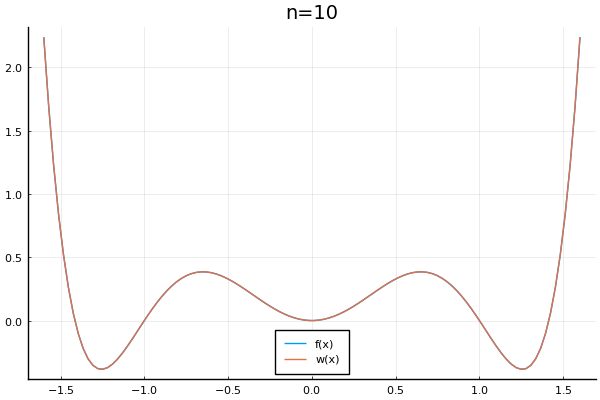

In [186]:
# ładny wielomian na test funkcji
g(x) = x^6-3x^4+2x^2
a = -1.6
b = 1.6
n = 10
rysujNnfx(g, a, b, n)

# Zadanie 5 i 6
Mamy przetestować metodę interpolacji zaimplementowaną wcześniej oraz rysowanie grafu, dla różnych funkcji, między innymi takich, które stawiają opór interpolacji wielomianowej. Wyniki i wnioski przedstawię poniżej.

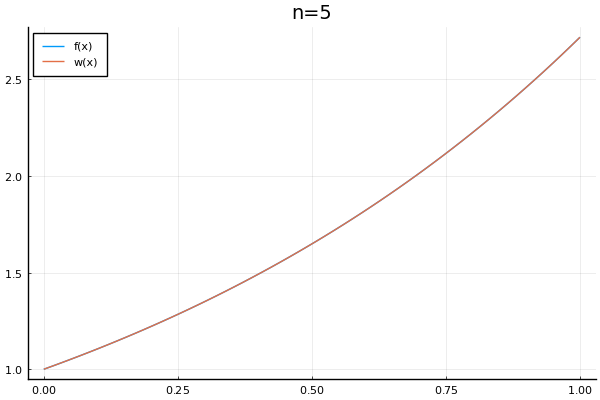

In [187]:
g(x) = Base.MathConstants.e^x
a = 0.0
b = 1.0
n = 5
rysujNnfx(g, a, b, n)

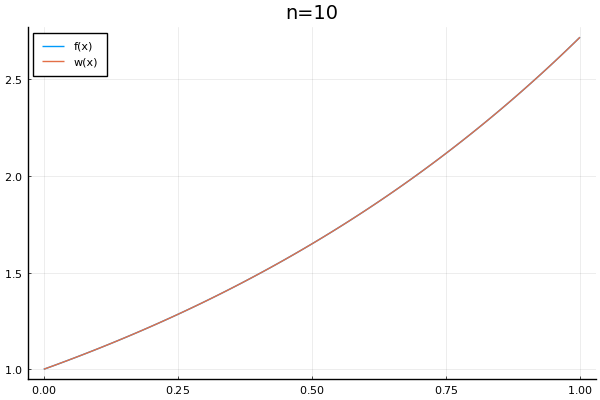

In [188]:
n = 10
rysujNnfx(g, a, b, n)

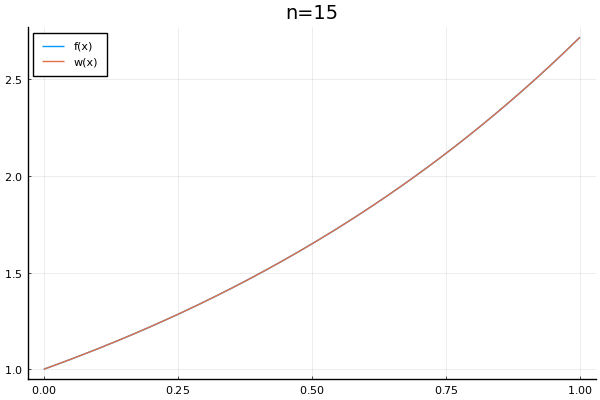

In [189]:
n = 15
rysujNnfx(g, a, b, n)

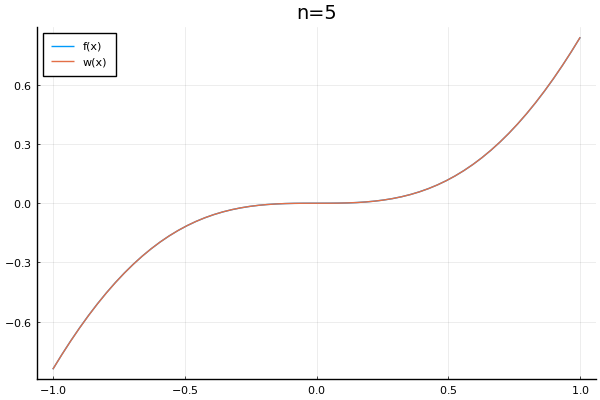

In [190]:
g(x) = x^2*sin(x)
a = -1.0
b = 1.0
n = 5
rysujNnfx(g, a, b, n)

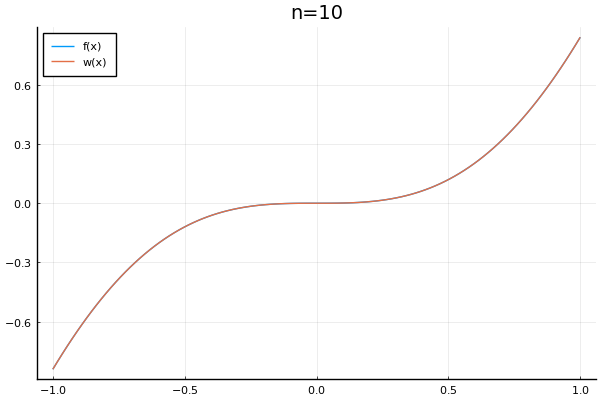

In [191]:
n = 10
rysujNnfx(g, a, b, n)

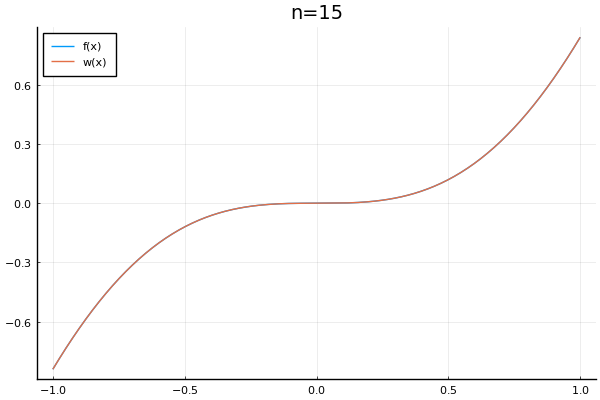

In [192]:
n = 15
rysujNnfx(g, a, b, n)

Teraz przejdziemy fo funkcji, które są źle interpolowane.

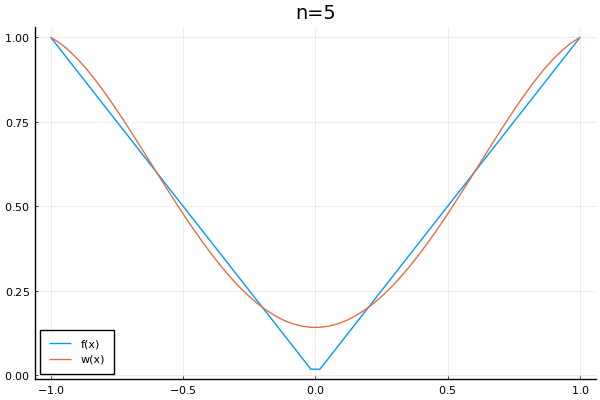

In [193]:
g(x) = abs(x)
a = -1.0
b = 1.0
n = 5
rysujNnfx(g, a, b, n)

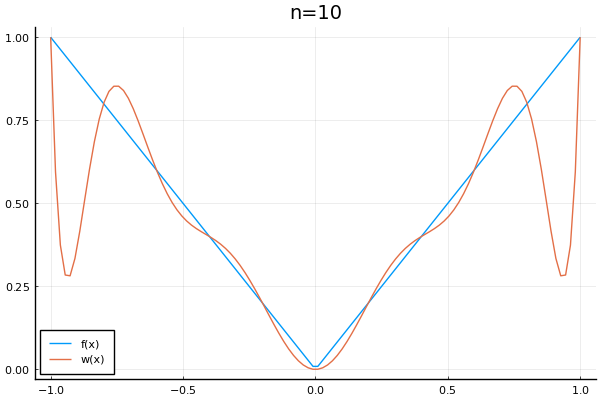

In [194]:
n = 10
rysujNnfx(g, a, b, n)

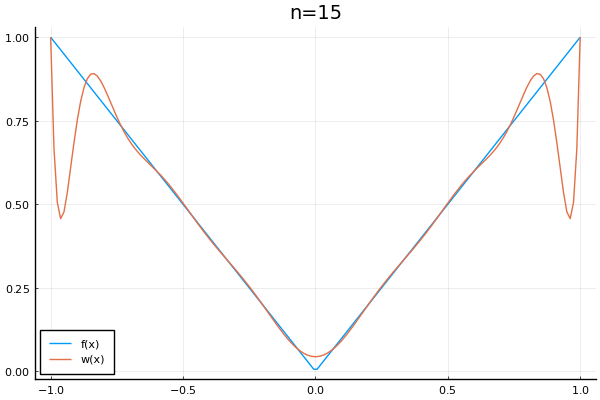

In [195]:
n = 15
rysujNnfx(g, a, b, n)

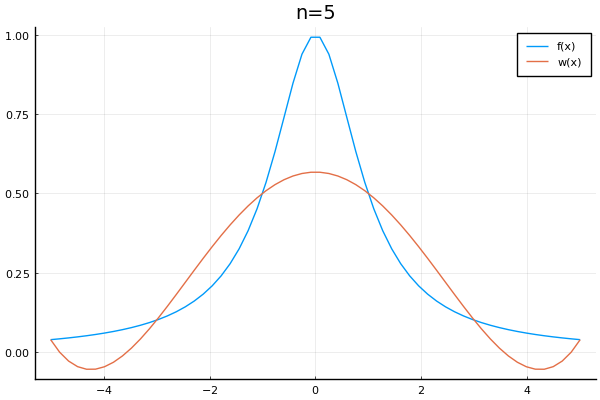

In [196]:
g(x) = 1.0/(1+x^2)
a = -5.0
b = 5.0
n = 5
rysujNnfx(g, a, b, n)

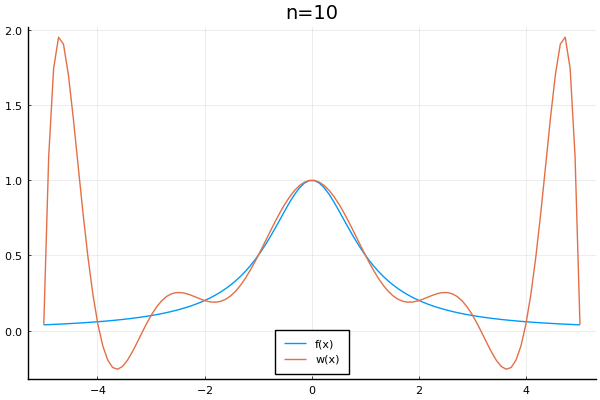

In [197]:
n = 10
rysujNnfx(g, a, b, n)

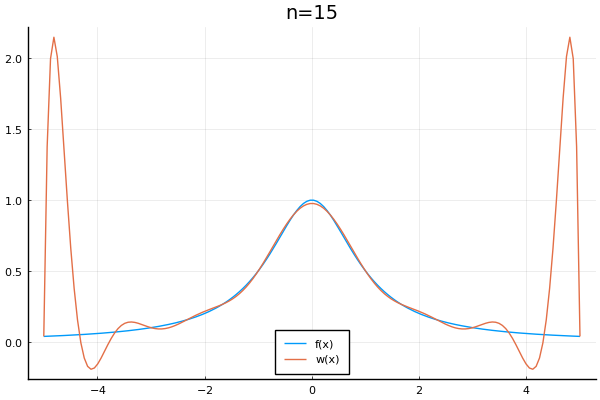

In [198]:
n = 15
rysujNnfx(g, a, b, n)

# Wnioski do zadania 5 i 6 
Badane funkcje $f_1(x) = e^x$ na przedziale $[0,1]$ i $f_2(x) = x^2sin(x)$ na $[-1,1]$, są dobrze interpolowane przez zaimplementowane metody interpolacji, już nawet dla $n = 5$.

Z kolei funkcje $f_3(x) = |x|$ na przedziale $[-1,1]$ i $f_4(x) = \frac{1}{1+x^2}$ na $[-5,5]$ są źle interpolowane. Co pokazuje, że zastosowane metody są podatne na błędy. Warty uwagi jest fakt, że zwiększenie liczby węzłów pomiędzy wykresem pierwszym i drugim dla funkcji $|x|$ pogarsza jej interpolacje, widać to zwłaszcza na krańcach przedziału.

Zwiększenie liczby węzłów pogarsza również interpoalcje na skrajach przedziału dla $\frac{1}{1+x^2}$, ale poprawia w okolicach $0$.

# Zjawisko Runge’go
To zjawisko charakterystyczne dla interpolacji przy użyciu wielomianów wysokich stopni i **stałej odległosci węzłów od siebie** nosi nazwę zjawiska Runge’go. Zjawisko zachodzi również kiedy interpolowana jest funkcja nieciągła.

Można rozwiązać ten problem poprzez zagęszczenie węzłów, zwłaszcza na krańcach przedziału.

# Wnioski
Omawiana i zaimplementowana na tej liście metoda interpolacji jest bardzo ciekawym zagadnieniem i fascynujące jest jak mało potrzeba aby przybliżyć niemałą klasę funkcji. Niemniej smuci fakt, że niektóre funkcję nie nadają się do interpolowania tą metodą. Natomiast zmiana gęstości węzłów oraz indywidualnie ustawiane parametry są obieucującym rozwiązaniem.